In [43]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [44]:
# help(fetch_openml)

In [45]:
# Save data
mnist = fetch_openml('mnist_784', version=1)
# Flatten Version of mnist
# dir(mnist)
# help(mnist.target)
mnist.target = mnist.target.astype(np.uint8)

In [46]:
# print(mnist.target)
# print(mnist)
# from pprint import pprint
# np.set_printoptions(linewidth=5000)
# print(mnist)
# pprint(mnist)

In [47]:
from sklearn.model_selection import train_test_split

x = mnist["data"]
y = mnist["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [48]:
# help(train_test_split)

In [49]:
# How much information we want to preserve/compress?
perc = 0.95 
# Means that save 95% of information

In [50]:
# Implement PCA (Principal Component Analysis)
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= perc) + 1

In [51]:
# What does this d mean?
# We had 784 pixel and this d say that we only need 154 pixel from all these pixels to preserve 95 percent of data
d

np.int64(154)

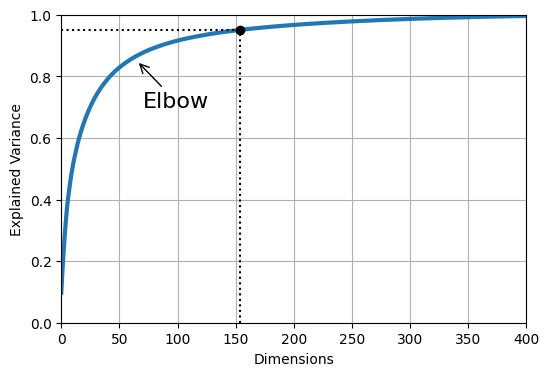

In [52]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, perc], "k:")
plt.plot([0, d], [perc, perc], "k:")
plt.plot(d, perc, "ko")
plt.annotate("Elbow",
             xy=(65, 0.85),
             xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"),
             fontsize=16)
plt.grid(True)
plt.show()


In [53]:
pca = PCA(n_components=perc)
# fit pca model on your training data
x_reduced = pca.fit_transform(x_train)

In [54]:
pca.n_components_

np.int64(154)

In [55]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9504051816602587)

In [ ]:
pca = PCA(n_components=d)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [90]:
x_reduced.shape

(52500, 154)

In [ ]:
# print(type(x_train))
# print(x_train.shape)
# dir(pd.core.frame.DataFrame)
# print(x_train.to_numpy())

<class 'pandas.core.frame.DataFrame'>
(52500, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

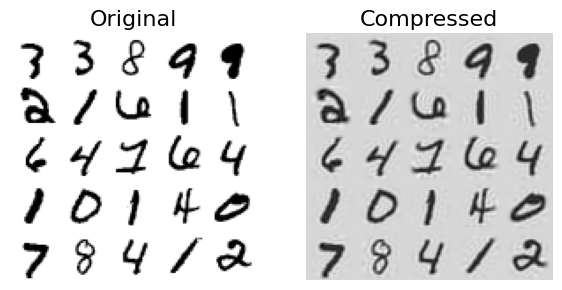

In [68]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train.to_numpy()[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)

# Creating a Dense Neural Network with this recovered data

In [70]:
import tensorflow as tf
tf.__version__

'2.19.0'

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44  80 164 255 254 254 254 254  85  80   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 253 253 253 253 253 253 253 253 253 167  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 107 191 191 191 191 191 191 232 253 253 253 244  83   0   0   0   0   0   0   0

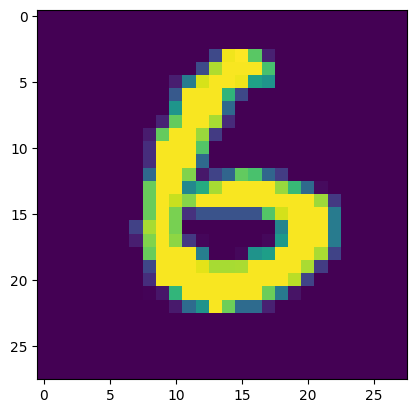

In [ ]:
np.set_printoptions(linewidth=5000)
# It is already Flatten :D so will get nothing useful from this
print(x_train.to_numpy()[0])
# But if you be a genius like me you can do this :D
x_train.to_numpy()[1].reshape(28,28)
plt.imshow(x_train.to_numpy()[1].reshape(28,28))

print(x_train.shape)
print(x_recovered.shape)

x_train = x_recovered/255.0
x_test = x_test/255.0

In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [87]:
# Initialize model
model = Sequential()

# Add layer to model
model.add(Dense(units=784))
# Base on PCA result for d
# Using relu cause it is fast
model.add(Dense(units=154, activation='relu'))
# Base that we have 10 different numbers that we want to classify
# Using softmax cause we want a probability distribution like output
model.add(Dense(units=10, activation='softmax'))

# Solver
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8944 - loss: 0.3406 - val_accuracy: 0.9546 - val_loss: 0.1484
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9606 - loss: 0.1254 - val_accuracy: 0.9646 - val_loss: 0.1242
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9653 - loss: 0.1141 - val_accuracy: 0.9611 - val_loss: 0.1424
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9696 - loss: 0.0982 - val_accuracy: 0.9633 - val_loss: 0.1487
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0935 - val_accuracy: 0.9673 - val_loss: 0.1343
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9750 - loss: 0.0847 - val_accuracy: 0.9614 - val_loss: 0.1604
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9754 - loss: 0.0831 - val_accuracy: 0.9670 - val_loss: 0.1446
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9784 - loss: 0.0756 - 

In [89]:
# Initialize model
model = Sequential()

# Add layer to model
model.add(Dense(units=784))
# Base on PCA result for d
# 154 = 11 * 7 *  2
# Using relu cause it is fast
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=2, activation='relu'))
# Base that we have 10 different numbers that we want to classify
# Using softmax cause we want a probability distribution like output
model.add(Dense(units=10, activation='softmax'))

# Solver
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3961 - loss: 1.6225 - val_accuracy: 0.6588 - val_loss: 1.1110
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6866 - loss: 1.0314 - val_accuracy: 0.7604 - val_loss: 0.8450
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7664 - loss: 0.8253 - val_accuracy: 0.7937 - val_loss: 0.7775
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7894 - loss: 0.7394 - val_accuracy: 0.7953 - val_loss: 0.7400
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8045 - loss: 0.6964 - val_accuracy: 0.8181 - val_loss: 0.6916
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8161 - loss: 0.6467 - val_accuracy: 0.8283 - val_loss: 0.6301
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.6202 - val_accuracy: 0.8336 - val_loss: 0.6115
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8346 - loss: 0.5875 - 

In [112]:
x_test.to_numpy()[0].shape
# x_test.to_numpy()[1]

res = model.predict(x_test)

547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


5


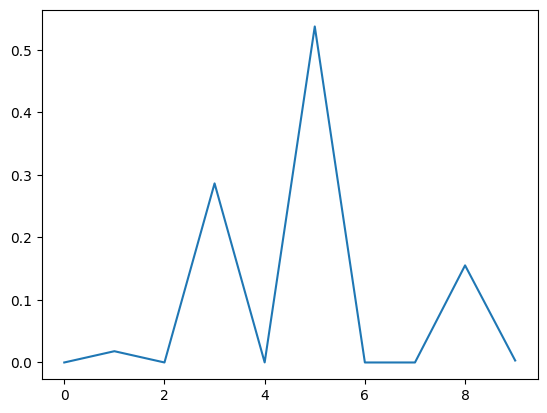

In [ ]:
res.shape
print(y_test.to_numpy()[0])
res[0]
plt.plot(range(10), res[0])